In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [9]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=y_train[:1000]
partial_y_train = y_train[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.5866 - acc: 0.5167 - val_loss: 1.6901 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.4056 - acc: 0.7062 - val_loss: 1.2974 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.0468 - acc: 0.7722 - val_loss: 1.1327 - val_acc: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.8260 - acc: 0.8237 - val_loss: 1.0294 - val_acc: 0.7970
Epoch 5/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.6580 - acc: 0.8675 - val_loss: 0.9688 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.5248 - acc: 0.8923 - val_loss: 0.9129 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.4202 - acc: 0.9157 - val_loss: 0.9129 - val_acc: 0.8050


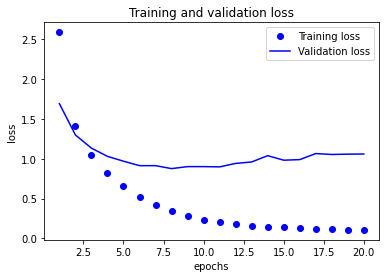

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

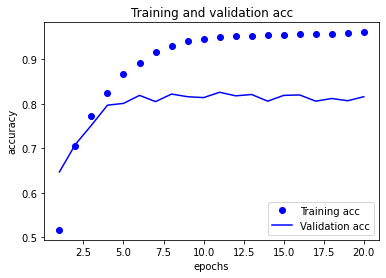

In [13]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 122us/step - loss: 2.7385 - accuracy: 0.5249 - val_loss: 1.7797 - val_accuracy: 0.6370
Epoch 2/9
7982/7982 [==============================] - 1s 106us/step - loss: 1.4265 - accuracy: 0.7053 - val_loss: 1.2889 - val_accuracy: 0.7180
Epoch 3/9
7982/7982 [==============================] - 1s 105us/step - loss: 1.0345 - accuracy: 0.7794 - val_loss: 1.1049 - val_accuracy: 0.7680
Epoch 4/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.8105 - accuracy: 0.8289 - val_loss: 1.0053 - val_accuracy: 0.7890
Epoch 5/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.6387 - accuracy: 0.8715 - val_loss: 0.9466 - val_accuracy: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.5050 - accuracy: 0.8956 - val_loss: 0.8853 - val_accuracy: 0.8270
Epoch 7/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.404

In [17]:
results

[0.9883914375984552, 0.784060537815094]

In [18]:
predictions = model.predict(x_test)

In [23]:
print('각 항목 길이 :',predictions[0].shape)
print('원소의 합 :',np.sum(predictions[0]))
print('가장 확률이 높은 클래스 :', np.argmax(predictions[0]))

각 항목 길이 : (46,)
원소의 합 : 1.0000001
가장 확률이 높은 클래스 : 3
